# Definitations


## Termionologies
**Adjacency matrix**: 
A matrix with rows and columns representing the ith and jth positional value of the nodes such that a_ij = 1 means the nodes are connected and a_ij = 0 means the otherwise. 

**Adjacency list**:
A list of nodes that are connected to the labelled nodes, usually represented by dictationary in python.

**Degree**: 
The number of edges connected to an specific node is its degree. 

**Walk**:
List of edges that are sequentially connected to form a continuous route on a network. A walk that doesn´t go though any edge more than once is called ***Trail***. A walk that doesn´t go thorough any nodes more than once is called ***Path***. A walk that starts and end at same nade without going through any node more than once is called ***Cycle***.

**Subgraph**:
A part of the newtork/graph.

**Connected graph**:
A graph with atleast a path between any pairs of nodes.

**Connected Component**:
A subgraph that is connected between themself but not with the rest of the graph.


## Topological Properties:


**Complete Graph**:
A graph in which any pairs of nodes are connected

**Regular graph**:
A graph where all the nodes have same degree. Eg, a complete graph is a regular graph.

**Biparttite graph**:
A graph where the nodes can be divided into two groups without any connection/edge between the groups, but there can be a node seperating the groups.

**Tree graph**:
A graph without any cycle. A group of tree graphs is called a forest.

**Planar graph**:
A graph which can be drawn in 2-D plane without any vertical/edge crossing.

# A) Constructing a graph

using NetworkX

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science','notebook'])

from pylab import *

### 1) Manually constructing the network/graph

In [27]:
#creating an empty graph object
g = nx.Graph()

# adding a node name "Jack"
g.add_node('Jack')

#adding set of nodes
g.add_nodes_from(['Sam', 'Rick', 'Nick'])

#adding edge between the nodes
g.add_edge('Sam', 'Rick')

#adding a set of edges
g.add_edges_from([('Jack', 'Nick'), ('Rick', 'Nick'), ('Jack', 'Sam')])

#adding more edges
#an undefined nodes will be created automatically
g.add_edges_from([('Jill', 'Nicki'), ('Bryan', 'Tom')])

#removing the edge
g.remove_edge('Rick', 'Nick')

# seeing the result
g

g.nodes()

#g.edges()

NodeView(('Jack', 'Sam', 'Rick', 'Nick', 'Jill', 'Nicki', 'Bryan', 'Tom'))

**Adjacency list format** visualization

In [26]:
# to visualize the internal raw data structure in adjacency list format
# convert the graph to a dictionary of dictionaries
adj_dict = nx.to_dict_of_dicts(g) 

# print the adjacency list dictionary
adj_dict

#the value dictationary is empty at the moment, but can be filled with the property of connection, eg: weight, etc

{'Jack': {'Nick': {}, 'Sam': {}},
 'Sam': {'Rick': {}, 'Jack': {}},
 'Rick': {'Sam': {}},
 'Nick': {'Jack': {}},
 'Jill': {'Nicki': {}},
 'Nicki': {'Jill': {}},
 'Bryan': {'Tom': {}},
 'Tom': {'Bryan': {}}}

**Adding Attributes** for both nodes and edges, think of it like adding the weights/properties.

In [33]:
# setting node attributes
node_weight = {'Jack': 'boy', 'Sam': 'girl', 'Rick': 'girl', 'Nick':'boy', 'Jill':'girl', 'Nicki':'girl', 'Bryan':'boy', 'Tom':'boy'}

#adding node attributes
nx.set_node_attributes(g, node_weight, 'gender')

# print the node attributes
print(nx.get_node_attributes(g, 'gender'))

{'Jack': 'boy', 'Sam': 'girl', 'Rick': 'girl', 'Nick': 'boy', 'Jill': 'girl', 'Nicki': 'girl', 'Bryan': 'boy', 'Tom': 'boy'}


In [35]:
#setting weight attributes
edge_weight = {('Jack', 'Nick'):'love', ('Jill', 'Nicki'):'hate'}

#adding edge attributes
nx.set_edge_attributes(g, edge_weight, 'relation')

#printing edge attributes
nx.get_edge_attributes(g, 'relation')

{('Jack', 'Nick'): 'love', ('Jill', 'Nicki'): 'hate'}

###  2) Built-in function for generating graphs

In [3]:
# complete graph made of 5 nodes
g1 = nx.complete_graph(5)

#complete (fully connected) by-partite graph
#lets say made up group of 3 nodes and 5 nodes
g2 = nx.complete_bipartite_graph(3,5)

#Karate club graph, famous classic example of social network
g3 = nx.karate_club_graph()

In [43]:
g2.edges

EdgeView([(0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7)])

# B) Visualizing Networks


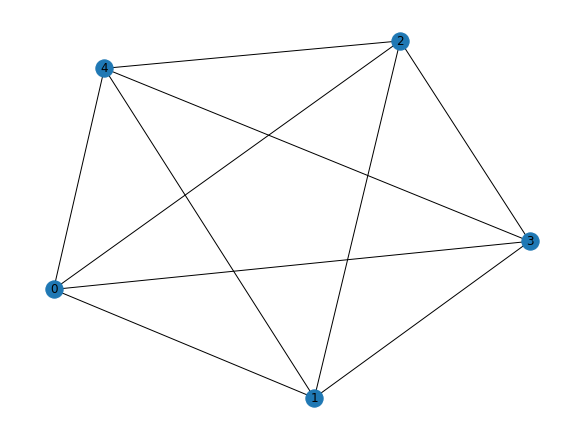

In [7]:
# complete graph made of 5 nodes
g1 = nx.complete_graph(5)

#drawing 
nx.draw(g1, with_labels=True)
plt.show()


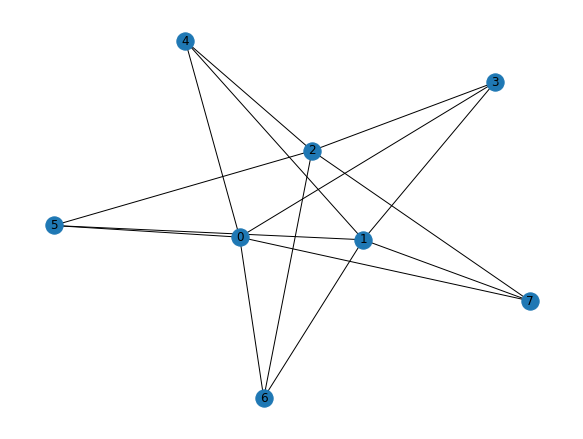

In [8]:
g2 = nx.complete_bipartite_graph(3,5)

nx.draw(g2, with_labels=True)

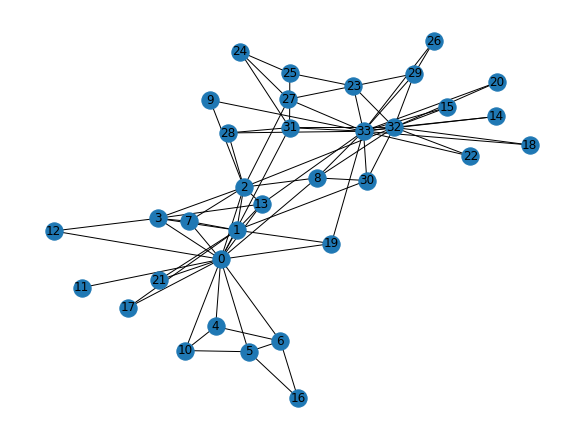

In [30]:
#Karate club graph, famous classic example of social network
g3 = nx.karate_club_graph()

nx.draw(g3, with_labels=True)

**layout algorithm**:
NetworkX uses the "spring layout" as a defult setting which is based on pseudo physics simulation of the movements of nodes, assuming each edges as a spring with a fixed equilibrium distance. This algorithm also suses random initial position. Other layout algorithms can be choosed as desired.


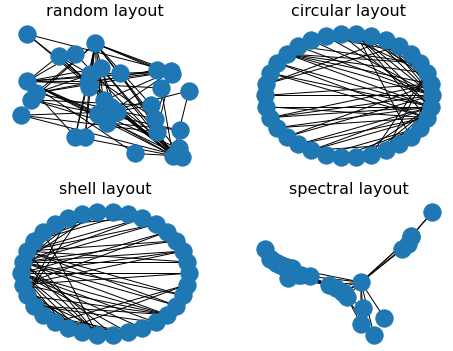

In [61]:
#plotting karate club network using in different layouts

plt.subplot(221)
nx.draw_random(g3)
plt.title('random layout')

plt.subplot(222)
nx.draw_circular(g3)
plt.title('circular layout')

plt.subplot(223)
nx.draw_shell(g3)
plt.title('shell layout')

plt.subplot(224)
nx.draw_spectral(g3)
plt.title('spectral layout')

plt.show()

**Setting Fixed Position** for the nodes in all the layouts


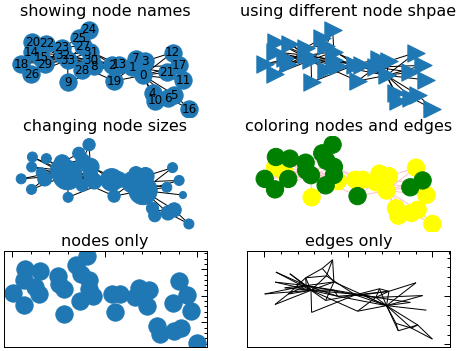

In [74]:
from pylab import *

positions = nx.spring_layout(g3)

subplot(3,2,1)
nx.draw(g3, positions, with_labels=True)
title('showing node names')

subplot(3,2,2)
nx.draw(g3, positions, node_shape='>')
title('using different node shpae')

subplot(3,2,3)
nx.draw(g3, positions, 
       node_size = [g3.degree(i)*50 for i in g3.nodes()])
title('changing node sizes')

subplot(3,2,4)
nx.draw(g3, positions, edge_color='pink',
       node_color=['yellow' if i<17 else 'green' for i in np.array(g3.nodes())])
title('coloring nodes and edges')

subplot(3,2,5)
nx.draw_networkx_nodes(g3,positions)
title('nodes only')

subplot(3,2,6)
nx.draw_networkx_edges(g3,positions)
title('edges only')

show()

# 3) Generating Random Graphs
There are several ways to randomly generate the graphs.

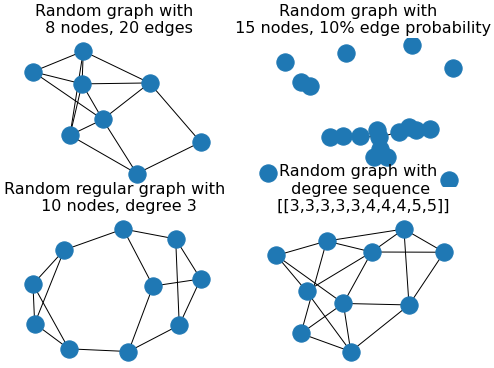

In [9]:
#generating random graph with n nodes and m edges
subplot(2,2,1)
nx.draw(nx.gnm_random_graph(8,15))
title('Random graph with \n 8 nodes, 20 edges')

subplot(2,2,2)
nx.draw(nx.gnp_random_graph(20,0.1))
title('Random graph with \n 15 nodes, 10% edge probability')

subplot(2,2,3)
nx.draw(nx.random_regular_graph(3,10))
title('Random regular graph with \n 10 nodes, degree 3')

subplot(2,2,4)
nx.draw(nx.random_degree_sequence_graph([3,3,3,3,4,4,4,4,5,5]))
# it automatically takes the number of degree sequence provided as number of nodes
# Be careful: not all the degree sequence are graphical,
#in that case we can check by following function: nx.is_graphical()
title('Random graph with \n degree sequence \n [[3,3,3,3,3,4,4,4,5,5]]')

show()

#### Uses of Random Graph
Rnadom graph can be generated by randomizing the exisiting graph topologies. This technique is healpful while comparing the certain property of the graph being studied to that of random graph (null model). 

There are several ways to randomize the graph, such as:

In [22]:
g_k = nx.karate_club_graph()
dict(g_k.degree()).values()

dict_values([16, 9, 10, 6, 3, 4, 4, 4, 5, 2, 3, 1, 2, 5, 2, 2, 2, 2, 2, 3, 2, 2, 2, 5, 3, 3, 2, 4, 3, 4, 4, 6, 12, 17])

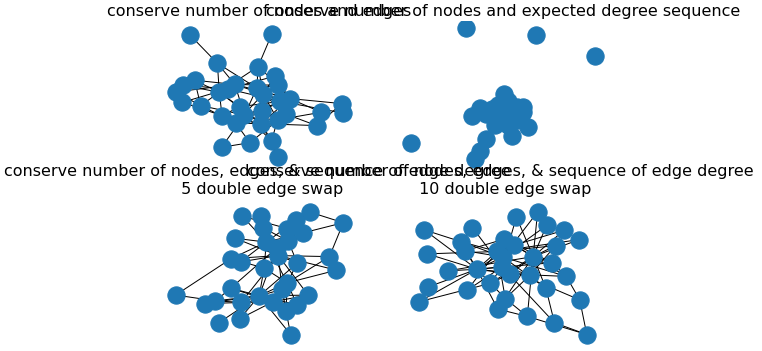

In [27]:
# lets take the Karate Club graph
g_k = nx.karate_club_graph()

figure=(15,15)
subplot(2,2,1)
# Random graph whihc conserve the number of nodes and edges
g_1 = nx.gnm_random_graph(g_k.number_of_nodes(), g_k.number_of_edges())
nx.draw(g_1)
title('conserve number of nodes and edges')

subplot(2,2,2)
# conserve number of nodes and sequence of expected node degree
g_2 = nx.expected_degree_graph(dict(g_k.degree()).values())
nx.draw(g_2)
title('conserve number of nodes and expected degree sequence')

subplot(2,2,3)
#conserve number of nodes and edges and sequence of node degree
#it actually takes the topology of given graph and swaps the edges to make new graph
g_3 = nx.double_edge_swap(g_k, 5) # conducts k double edge swaps
nx.draw(g_3)
title('conserve number of nodes, edges, & sequence of edge degree \n 5 double edge swap')

subplot(2,2,4)
g_4 = nx.double_edge_swap(g_k, 10)
nx.draw(g_4)
title('conserve number of nodes, edges, & sequence of edge degree \n 10 double edge swap')

show()